<a href="https://colab.research.google.com/github/NikhilVarma-777/Project/blob/main/Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic customer churn data
num_customers = 1000

data = {
    "Customer_ID": range(1, num_customers + 1),
    "Age": np.random.randint(18, 70, num_customers),
    "Subscription_Length_Months": np.random.randint(1, 60, num_customers),
    "Monthly_Bill": np.random.randint(10, 200, num_customers),
    "Total_Usage_GB": np.random.randint(1, 500, num_customers),
    "Support_Calls": np.random.randint(0, 10, num_customers),
    "Payment_Method": np.random.choice(["Credit Card", "PayPal", "Bank Transfer"], num_customers),
    "Contract_Type": np.random.choice(["Monthly", "Yearly"], num_customers),
    "Churn": np.random.choice(["Yes", "No"], num_customers, p=[0.25, 0.75])  # 25% churn rate
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save dataset to a CSV file
df.to_csv("customer_churn_data.csv", index=False)

# Display first few rows
print(df.head())
from google.colab import files
files.download("customer_churn_data.csv")


   Customer_ID  Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0            1   56                          35           122             473   
1            2   69                          51            26             114   
2            3   46                          15           113             278   
3            4   32                          25           107             414   
4            5   60                          55           197             468   

   Support_Calls Payment_Method Contract_Type Churn  
0              1         PayPal       Monthly    No  
1              0    Credit Card       Monthly    No  
2              8    Credit Card        Yearly   Yes  
3              2         PayPal        Yearly    No  
4              0  Bank Transfer        Yearly   Yes  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_churn_data.csv")

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())


   Customer_ID  Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0            1   56                          35           122             473   
1            2   69                          51            26             114   
2            3   46                          15           113             278   
3            4   32                          25           107             414   
4            5   60                          55           197             468   

   Support_Calls Payment_Method Contract_Type Churn  
0              1         PayPal       Monthly    No  
1              0    Credit Card       Monthly    No  
2              8    Credit Card        Yearly   Yes  
3              2         PayPal        Yearly    No  
4              0  Bank Transfer        Yearly   Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])  # Yes = 1, No = 0
df = pd.get_dummies(df, columns=["Payment_Method", "Contract_Type"], drop_first=True)  # One-hot encoding

# Check updated dataset
df.head()


,Customer_ID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Support_Calls,Churn,Payment_Method_Credit Card,Payment_Method_PayPal,Contract_Type_Yearly
0,1,56,35,122,473,1,0,False,True,False
1,2,69,51,26,114,0,0,True,False,False
2,3,46,15,113,278,8,1,True,False,True
3,4,32,25,107,414,2,0,False,True,True
4,5,60,55,197,468,0,1,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["Customer_ID", "Churn"])  # Drop non-relevant columns
y = df["Churn"]  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       149
           1       0.50      0.08      0.14        51

    accuracy                           0.74       200
   macro avg       0.63      0.53      0.49       200
weighted avg       0.69      0.74      0.67       200



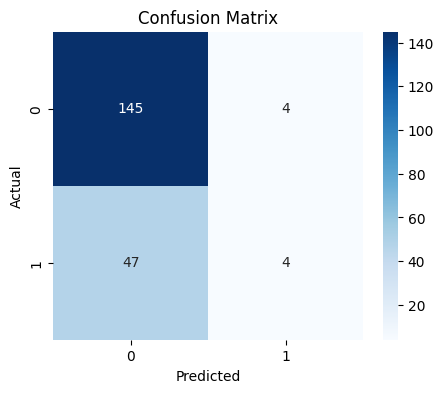

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


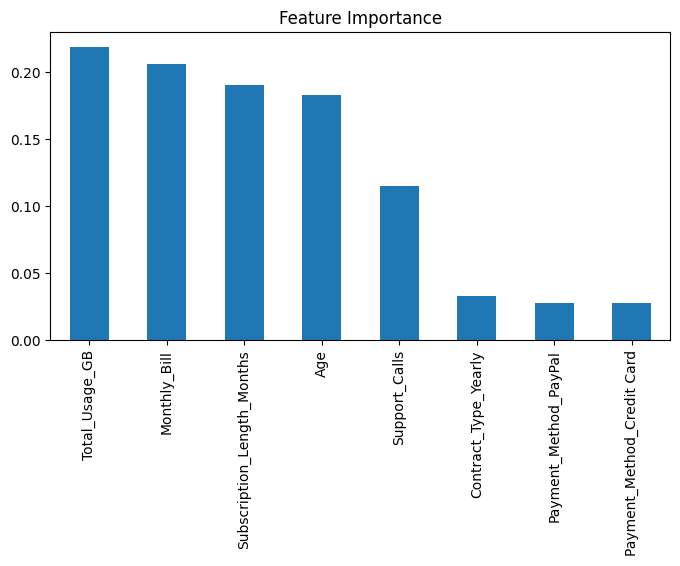

In [ ]:
# Get feature importances
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(8,4), title="Feature Importance")
plt.show()
